# Summary

This document contains all the steps concerning the actual machine learning. 

In [1]:
# Load packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import sklearn
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pickle

In [2]:
# Read in data
df = pd.read_csv('~/Documents/GitHub/Trump-Twitter-Predictions/Data/final_abt.csv')
X_test = pd.read_csv('~/Documents/GitHub/Trump-Twitter-Predictions/Data/X_test.csv')
y_test = pd.read_csv('~/Documents/GitHub/Trump-Twitter-Predictions/Data/y_test.csv')

# Separate df into X, y
y_train = df.favorite_count
X_train = df.drop(['favorite_count'], axis = 1) 

# xgb train matrix - to be used for xgboost's own cv method to determine optimal n_estimators 
xgtrain = xgb.DMatrix(data = X_train[:].values, label = y_train.values)

# sklearn

Will try a full model linear regression, lasso regression, ridge regression, backwards BIC feature selected linear regression (conducted in R), and random forest. 

## Linear Models

In [3]:
pipelines = {
    'ols': make_pipeline(StandardScaler(), LinearRegression()),
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
     'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)) 
}

In [4]:
# ols hyperparameters
ols_hyperparameters = {}
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha': [.001, .005, .01, .05, .1, .5, 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparametrs = {
    'ridge__alpha': [.001, .005, .01, .05, .1, .5, 1, 5, 10]
}
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [.001, .005, .01, .05, .1, .5, 1, 5, 10],
    'elasticnet__l1_ratio': [.1, .3, .5, .7, .9]
}

hyperparameters = {'ols': ols_hyperparameters, 'lasso': lasso_hyperparameters, 
                   'ridge': ridge_hyperparametrs, 'enet': enet_hyperparameters}

In [5]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X=X_train, y=y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

ols has been fitted.


/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

lasso has been fitted.
ridge has been fitted.


/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SamadPatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

enet has been fitted.


In [6]:
# Code here
for model_name in fitted_models.keys():
    pred = fitted_models[model_name].predict(X_test)
    print(model_name, '\n-----')
    print('R^2:', r2_score(y_pred=pred, y_true=y_test))
    print('MAE', mean_absolute_error(y_pred=pred, y_true = y_test),'\n')

ols 
-----
R^2: 0.25201090059987286
MAE 19812.331362511522 

lasso 
-----
R^2: 0.26038722762007227
MAE 19743.470589407152 

ridge 
-----
R^2: 0.264244684541559
MAE 19745.034233389208 

enet 
-----
R^2: 0.27168048489620655
MAE 20345.863147124568 



### OLS with Selected Features 
OLS with all the features doesn't meet all the assumptions of linear regression. After conducting a backward BIC step-search and Box Cox transformation in R, I found a model that does. I will test it here in case it becomes the final model. 

In [7]:
# Initialize Model
linmod = LinearRegression()

# Extracted relevant features (see RCode)
X = X_train[['Followers', 'Follower_Change', 'Num_Tweets', 'Year', 
              'Month', 'Day', 'Hour', 'Holiday', 'Any_urls', 'Character_Count', 
              'Num_Stopwords', 'Any_Hashtags', 'Any_Mentions', 'Num_Upper', 
              'Upper', 'Num_Exclaim', 'Any_Clinton', 'FakeNews', 'JoinMe', 'Violence',
              'tfidf', 'Subjectivity']]

# Fit model
linmod.fit(y=y_train**0.05777432, X = X)

# Fix X_test
lin_X_test = X_test[['Followers', 'Follower_Change', 'Num_Tweets', 'Year', 
              'Month', 'Day', 'Hour', 'Holiday', 'Any_urls', 'Character_Count', 
              'Num_Stopwords', 'Any_Hashtags', 'Any_Mentions', 'Num_Upper', 
              'Upper', 'Num_Exclaim', 'Any_Clinton', 'FakeNews', 'JoinMe', 'Violence',
              'tfidf', 'Subjectivity']]

# Predict - make sure to back transform 
pred = linmod.predict(lin_X_test)
pred = pred**(1/0.05777432)

# Evaluate 
print('R^2:', r2_score(y_pred=pred, y_true=y_test))
print('MAE', mean_absolute_error(y_pred=pred, y_true = y_test),'\n')

R^2: 0.2285121030713516
MAE 19926.73222825883 



### Ridge with Selected Features and BoxCox
LASSO automatically conducts feature selection, but I am curious if Ridge will outperform with features already selected. 

In [8]:
ridgemod = make_pipeline(StandardScaler(), Ridge(random_state=123))

# Ridge hyperparameters
ridge_hyperparameters2 = {
    'ridge__alpha': [.01, .5, .1, .5, 1, 5, 10, 15, 20]
}

ridgemod = GridSearchCV(ridgemod, ridge_hyperparameters2, cv = 10, n_jobs = -1)
ridgemod.fit(X = X, y=y_train**(.05777432))

# Predict - make sure to back transform 
pred = ridgemod.predict(lin_X_test)
pred = pred**(1/.05777432)

# Evaluate 
print('R^2:', r2_score(y_pred=pred, y_true=y_test))
print('MAE', mean_absolute_error(y_pred=pred, y_true = y_test),'\n')

R^2: 0.24945751268488703
MAE 19842.020974480452 



## BoxCox with LASSO, Ridge, ENet

It's worth seeing if the lambda from the BoxCox transformation improves the predictions for these models as well. 

In [9]:
# Create empty dictionary called fitted_models
boxcox_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X=X_train, y=y_train**.05777432)
    
    # Store model in fitted_models[name] 
    boxcox_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    
# Evaluate
print('\n')
for model_name in boxcox_models.keys():
    pred = boxcox_models[model_name].predict(X_test)
    pred = pred**(1/.05777432)
    print(model_name, '\n-----')
    print('R^2:', r2_score(y_pred=pred, y_true=y_test))
    print('MAE', mean_absolute_error(y_pred=pred, y_true = y_test),'\n')

ols has been fitted.
lasso has been fitted.
ridge has been fitted.
enet has been fitted.


ols 
-----
R^2: 0.23069236884746358
MAE 19819.258295021395 

lasso 
-----
R^2: 0.2775865750654305
MAE 20007.377108648667 

ridge 
-----
R^2: 0.24821002985512353
MAE 19689.766231352165 

enet 
-----
R^2: 0.27987866904566083
MAE 19782.831431401988 



# RandomForest

In [10]:
# Random Forest Pipeline 
rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))

# Hyperparameter grid
rf_params = {
    'randomforestregressor__n_estimators': [200, 500, 800],
    'randomforestregressor__max_features': ['log2', 'sqrt', .33], 
    'randomforestregressor__max_depth': [None, 5, 8], 
    'randomforestregressor__min_samples_split': [1.0, 2, 5],
    'randomforestregressor__min_samples_leaf': [1, 5]}

rf_model = GridSearchCV(rf_pipeline, rf_params, cv = 10, n_jobs = -1)
rf_model.fit(X_train, y_train)

# Checking performance
pred = rf_model.best_estimator_.predict(X_test)
print('R^2:', r2_score(y_pred=pred, y_true=y_test))
print('MAE', mean_absolute_error(y_pred=pred, y_true = y_test),'\n')

R^2: 0.24257893124542018
MAE 21716.101473921288 



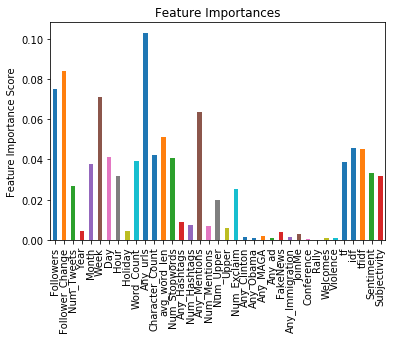

In [11]:
a = rf_model.best_estimator_.named_steps['randomforestregressor']
feat_imp = pd.Series(a.feature_importances_, index=X_train.columns)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

The linear models outperformed Random Forest. I will take more care in tuning XGBoost to see if the linear models here are truly better than tree-based models 

# XGBoost

In [12]:
# Function to evaluate current model on training and test data, which outputs evluation metrics and optimal n_estimators
def ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain, useCV = True):
    if useCV == True: 
        # Find the parameters that are being used 
        xgb_params = xgb_alg.get_xgb_params()
        # Plug those into the xgb cross validation method to determine optimal n_estimators
        xgb_cv_results = xgb.cv(params = xgb_params, dtrain = xgtrain, num_boost_round=xgb_params['n_estimators'], 
                               nfold = 10, metrics = 'mae', early_stopping_rounds = 50)
        # Print n_estimators
        print('The optimal number of estimators is', xgb_cv_results.shape[0])
        # Change n_estimators of xgb_alg; it's the number of rows of xgb_cv_results (as each estimator returns a row)
        xgb_alg.set_params(n_estimators = xgb_cv_results.shape[0])
    
    # Now fit the algorithm
    xgb_alg.fit(X_train, y_train, eval_metric = 'mae')
    
    # Evaluate on test data
    prediction = xgb_alg.predict(X_test)
    print('Mean Absolute Error is:', mean_absolute_error(y_pred=prediction, y_true = y_test))
    
    # Graphs                
    feat_imp = pd.Series(xgb_alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

The optimal number of estimators is 401
Mean Absolute Error is: 174094.2440356183


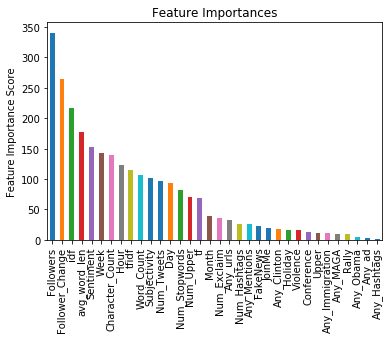

In [13]:
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

### Tune Max Depth and Min Child Weight

In [14]:
# Tune Max Depth and Min Child Weight
params1 = {
    'max_depth': [3, 7, 13],
    'min_child_weight': [1, 3, 5]
}

# Create grid search object
gridsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=401, random_state = 123), 
                           param_grid = params1,
                           cv = 10, n_jobs=-1)
# Use training data to tune
gridsearch1.fit(X_train, y_train)

# Evaluate
print(gridsearch1.best_params_, gridsearch1.best_score_)
pred = gridsearch1.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'max_depth': 3, 'min_child_weight': 5} 0.08679597485089845
Mean Absolute Error is: 28832.641801075268


In [15]:
# Check for more optimal values right around those selected above
params2 = {
    'max_depth':[3,4,5,6],
    'min_child_weight': [5,6,7]
}
# Create grid search object
gridsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=401, 
                                                    random_state = 123), 
                           param_grid = params2,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch2.fit(X_train, y_train)

# Evaluate 
print(gridsearch2.best_params_, gridsearch2.best_score_)
pred = gridsearch2.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'max_depth': 3, 'min_child_weight': 7} 0.09350759799489035
Mean Absolute Error is: 34404.784148185485


#### Update Boosting Rounds 

The optimal number of estimators is 210
Mean Absolute Error is: 32316.667023689515


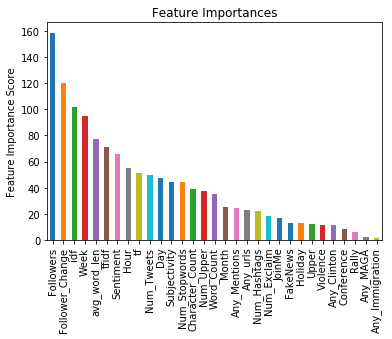

In [16]:
# Update Boosting Rounds 
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, max_depth=3, min_child_weight=7, random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

### Tune Gamme

In [17]:
# Tune Gamma
params_gamma = {
    'gamma': [0.0, .05, .3, .5, .9, 1.0]
}

# GridSearch
gridsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=210, max_depth=3, random_state = 123,
                                                    min_child_weight=7), 
                           param_grid = params_gamma,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch3.fit(X_train, y_train)

# Evaluate 
print(gridsearch3.best_params_, gridsearch3.best_score_)
pred = gridsearch3.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'gamma': 0.0} 0.10888769644099135
Mean Absolute Error is: 32316.667023689515


#### Update Boosting Rounds 

The optimal number of estimators is 210
Mean Absolute Error is: 32316.667023689515


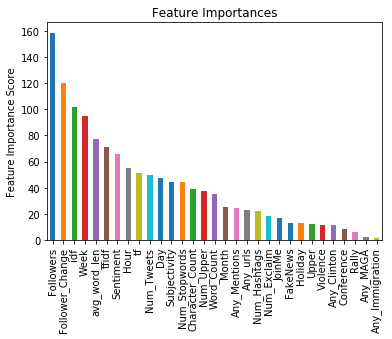

In [18]:
# Update Boosting Rounds 
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, max_depth=3, min_child_weight=7, gamma = 0, 
                      random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

### Tune subsample and colsampe_bytree

In [19]:
# Tune subsample and colsample_bytree
params4 = {
    'subsample': [.6, .8, 1.0], 
    'colsample_bytree': [.6, .8, 1.0]
}

# Gridsearch
gridsearch4 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=210, max_depth=3, 
                                                    min_child_weight=7, gamma = 0, random_state = 123), 
                           param_grid = params4,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch4.fit(X_train, y_train)

# Evaluate 
print(gridsearch4.best_params_, gridsearch4.best_score_)
pred = gridsearch4.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'colsample_bytree': 0.6, 'subsample': 0.6} 0.12345987192673837
Mean Absolute Error is: 30195.923051075268


#### Update Boosting Rounds 

The optimal number of estimators is 238
Mean Absolute Error is: 29898.97691952285


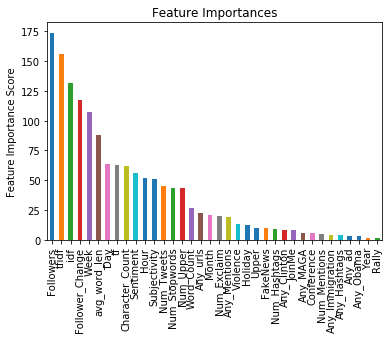

In [20]:
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, max_depth=3, min_child_weight=7, gamma = 0,
                       colsample_bytree = .6, subsample = .6, random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

In [21]:
# Check for more optimal values right around those selected above
params5 = {
    'subsample': [.55, .6, .65, .7, .75], 
    'colsample_bytree': [.55, .6, .65, .7, .75]
}

# GridSearch
gridsearch5 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=238, max_depth=3, 
                                                    min_child_weight=7, gamma = 0, random_state = 123), 
                           param_grid = params5,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch5.fit(X_train, y_train)

# Evaluate 
print(gridsearch5.best_params_, gridsearch5.best_score_)
pred = gridsearch5.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'colsample_bytree': 0.65, 'subsample': 0.6} 0.12754431138910408
Mean Absolute Error is: 30713.968665994624


The optimal number of estimators is 218
Mean Absolute Error is: 31041.6603452621


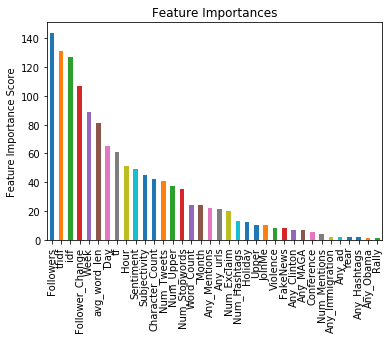

In [22]:
# Update Boosting Rounds 
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, max_depth=3, min_child_weight=7, gamma = 0, 
                      colsample_bytree = .65, subsample = .6, random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

In [23]:
# Tuning Regularization Parameters
params_reg = {
        'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
        'reg_lambda': [0, .5, 1, 2, 3]
}

# GridSearch
gridsearch6 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=218, max_depth=3, 
                                                    min_child_weight=7, gamma = 0, colsample_bytree = .65, 
                                                    subsample = .6, random_state = 123), 
                           param_grid = params_reg,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch6.fit(X_train, y_train)

# Evaluate 
print(gridsearch6.best_params_, gridsearch6.best_score_)
pred = gridsearch6.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'reg_alpha': 1, 'reg_lambda': 1} 0.13128553969816048
Mean Absolute Error is: 31041.61158014113


The optimal number of estimators is 268
Mean Absolute Error is: 29546.96664986559


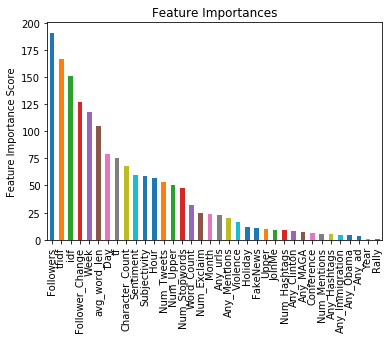

In [24]:
xgb_alg = XGBRegressor(learning_rate=.1, n_estimators=1000, max_depth=3, min_child_weight=7, gamma = 0,
                       colsample_bytree = .6, subsample = .6, reg_alpha = 1, reg_lambda = 1, random_state = 123)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

In [25]:
# Check for more optimal values around those slected above 
params_reg2 = {
        'reg_alpha': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
        'reg_lambda': [.5, .6, .7, .8, .9, 1]
}

# GridSearch
gridsearch7 = GridSearchCV(estimator = XGBRegressor(learning_rate=.1, n_estimators=268, max_depth=3, 
                                                    min_child_weight=7, gamma = 0, colsample_bytree = .65, 
                                                    subsample = .6, random_state = 123), 
                           param_grid = params_reg2,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch7.fit(X_train, y_train)

# Evaluate 
print(gridsearch7.best_params_, gridsearch7.best_score_)
pred = gridsearch7.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'reg_alpha': 1, 'reg_lambda': 1} 0.12541922699010954
Mean Absolute Error is: 32459.7244203629


In [26]:
# Determine optimal learning rate 
params_eta = {
        'learning_rate': [.01, .05, .1, .2]
}

# GridSearch
gridsearch7 = GridSearchCV(estimator = XGBRegressor(n_estimators=268, max_depth=3, random_state = 123, 
                                                    min_child_weight=7, gamma = 0, colsample_bytree = .65, 
                                                    subsample = .6, reg_alpha = 1, reg_lambda = 1), 
                           param_grid = params_eta,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch7.fit(X_train, y_train)

# Evaluate 
print(gridsearch7.best_params_, gridsearch7.best_score_)
pred = gridsearch7.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'learning_rate': 0.05} 0.1429873097046488
Mean Absolute Error is: 28019.742523521505


In [27]:
# Determine optimal learning rate 
params_eta2 = {
        'learning_rate': [.02, .03, .04, .05, .06, .07, .08, .09, .1]
}

# GridSearch
gridsearch8 = GridSearchCV(estimator = XGBRegressor(n_estimators=268, max_depth=3, random_state = 123, 
                                                    min_child_weight=7, gamma = 0, colsample_bytree = .65, 
                                                    subsample = .6, reg_alpha = .7, reg_lambda = 1), 
                           param_grid = params_eta2,
                           cv = 10, n_jobs=-1)
# Fit
gridsearch8.fit(X_train, y_train)

# Evaluate 
print(gridsearch8.best_params_, gridsearch8.best_score_)
pred = gridsearch8.best_estimator_.predict(data=X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

{'learning_rate': 0.04} 0.14643485018579389
Mean Absolute Error is: 25607.057123655915


The optimal number of estimators is 523
Mean Absolute Error is: 31594.086252520163


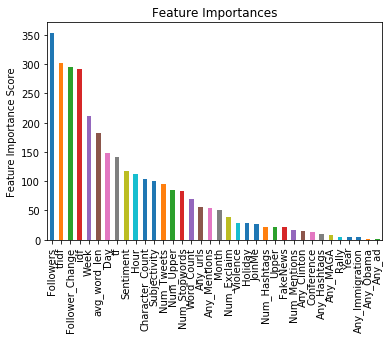

In [28]:
# Find optimal number of trees with learning rate of .05
xgb_alg = XGBRegressor(max_depth=3, n_estimators=1200, learning_rate=.04, min_child_weight=7, random_state = 123,
                       gamma = 0, colsample_bytree = .65, subsample = .6, reg_alpha = .7, reg_lambda = 1)
ModelEvaluation(xgb_alg, X_train, X_test, y_train, y_test, xgbtrain = xgtrain)

Mean Absolute Error is: 25607.057123655915


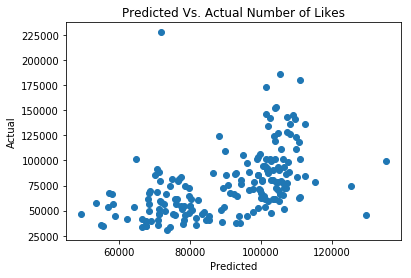

In [29]:
# Wrap it up 
final_model = XGBRegressor(learning_rate=.04, n_estimators=268, max_depth=3, random_state = 123, 
                           min_child_weight=7, gamma = 0, colsample_bytree = .65, 
                           subsample = .6, reg_alpha = .7, reg_lambda = 1)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)
print('Mean Absolute Error is:', mean_absolute_error(y_pred=pred, y_true = y_test))

# Plot 
plt.scatter(pred, y_test)
plt.title('Predicted Vs. Actual Number of Likes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

It appears that linear models actually outperformed tree-based models for this project. The BoxCox transformed Ridge Regression model had the lowest mean average error, but the BoxCox transformed Elastic Net model had a very close mean absolute error with the highest R^2 value of any model I tested. Therefore, I will select the Elastic Net model. 

In [31]:
pickle.dump(boxcox_models['enet'].best_estimator_, 
            open('/Users/SamadPatel//Documents/GitHub/Trump-Twitter-Predictions/Final_Product/enet_model', 'wb'))